In [26]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('student_grades.db')
cursor = conn.cursor()

cursor.execute('DROP TABLE IF EXISTS grades')
cursor.execute('DROP TABLE IF EXISTS students')

cursor.execute('''
CREATE TABLE students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

cursor.execute('''
CREATE TABLE grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('INSERT INTO students (first_name, last_name) VALUES (?, ?)', students_data)

grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 70),
    (3, 'English', 75),
    (3, 'History', 78),
    (4, 'Math', 78),
    (4, 'English', 98),
    (4, 'History', 99),
    (5, 'Math', 89),
    (5, 'English', 96),
    (5, 'History', 88)
]

cursor.executemany('INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)', grades_data)

conn.commit()

In [27]:
pd.read_sql('SELECT * FROM students', conn)

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [28]:
pd.read_sql('SELECT * FROM grades', conn)

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76
5,6,2,History,85
6,7,3,Math,70
7,8,3,English,75
8,9,3,History,78
9,10,4,Math,78


In [32]:
#Query 1
query1 = '''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
'''

query1_display = pd.read_sql(query1, conn)
query1_display

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76
5,Bob,Smith,History,85
6,Carol,White,Math,70
7,Carol,White,English,75
8,Carol,White,History,78
9,David,Brown,Math,78


In [33]:
#Query 2
query2 = '''
SELECT students.first_name, students.last_name, AVG(grades.grade) as average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
'''

query2_display = pd.read_sql(query2, conn)
query2_display

,first_name,last_name,average_grade
0,Alice,Johnson,91.000000
1,Bob,Smith,81.000000
2,Carol,White,74.333333
3,David,Brown,91.666667
4,Eve,Davis,91.000000


In [35]:
#Query 3
query3 = '''
SELECT students.first_name, students.last_name, AVG(grades.grade) as average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1
'''

query3_display = pd.read_sql(query3, conn)
query3_display

,first_name,last_name,average_grade
0,David,Brown,91.666667


In [36]:
#Query 4
query4 = '''
SELECT AVG(grade) as avg_math_grade
FROM grades
WHERE subject = 'Math'
'''

query4_display = pd.read_sql(query4, conn)
query4_display

,avg_math_grade
0,82.8


In [37]:
#Query 5
query5 = '''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
'''

query5_display = pd.read_sql(query5, conn)
query5_display

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,David,Brown,English,98
2,David,Brown,History,99
3,Eve,Davis,English,96


In [38]:
#save data to data frame
students = pd.read_sql('SELECT * FROM students', conn)
students

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [39]:
#save data to data frame
grades = pd.read_sql('SELECT * FROM grades', conn)
grades

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76
5,6,2,History,85
6,7,3,Math,70
7,8,3,English,75
8,9,3,History,78
9,10,4,Math,78


In [41]:
# joining data into one data frame using JOIN query
combined = pd.read_sql('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', conn)

combined

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76
5,Bob,Smith,History,85
6,Carol,White,Math,70
7,Carol,White,English,75
8,Carol,White,History,78
9,David,Brown,Math,78


Text(0.5, 1.0, 'Average Grades for Each Student')

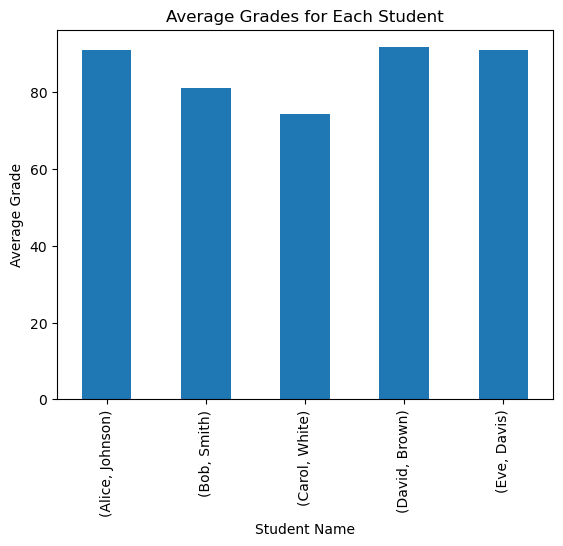

In [55]:
# average grades for each student
average_grades = combined.groupby(['first_name', 'last_name'])['grade'].mean()

# bar chart
average_grades.plot(kind='bar')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')

Text(0.5, 1.0, 'Average Grades for Each Subject')

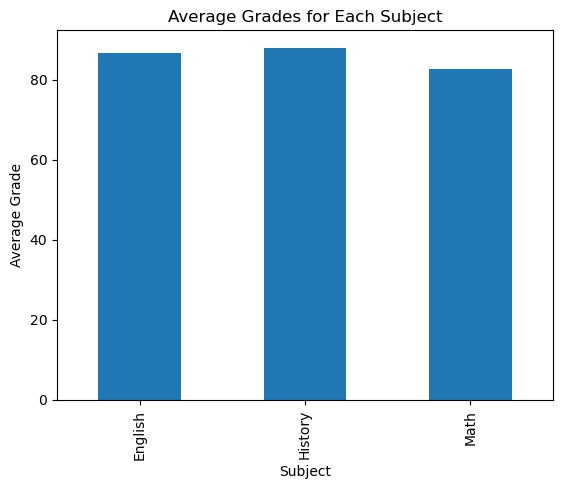

In [54]:
# average grades for each student
average_subject_grades = combined.groupby(['subject'])['grade'].mean()

# bar chart
average_subject_grades.plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Subject')

In [47]:
# Bonus
bonus_query = '''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE (grades.subject, grades.grade) IN (
    SELECT subject, MAX(grade)
    FROM grades
    GROUP BY subject
);
'''
bonus_query_display = pd.read_sql_query(bonus_query, conn)
bonus_query_display

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,David,Brown,English,98
2,David,Brown,History,99


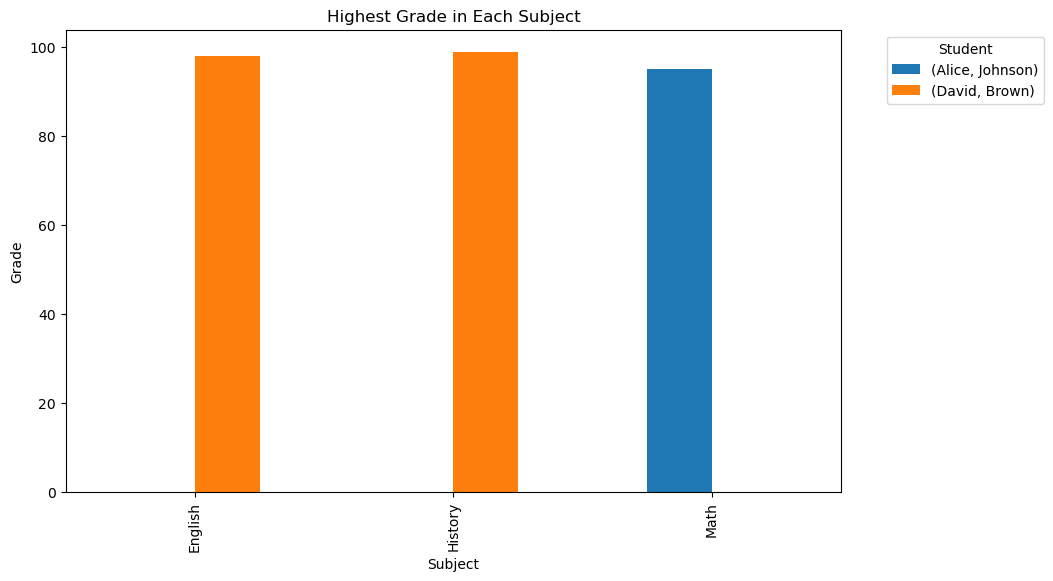

In [53]:
graph = bonus_query_display.pivot(index='subject', columns=['first_name', 'last_name'], values='grade')

graph.plot(kind='bar', figsize=(10, 6), title='Highest Grade in Each Subject')
plt.ylabel('Grade')
plt.xlabel('Subject')
plt.legend(title='Student', bbox_to_anchor=(1.05, 1), loc='upper left')